# Case Study on Correlation and Regression
A textile company regularly spent money on five advertising companies for their 
ads. (Dataset added along with)
1. First of all, check whether there is any relationship between the amount 
spent for advertising through five different companies and profit 
generated.
2. Build a regression model to predict the profit from the given data and 
comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the 
following amount for advertisement.

Add1(in Thousands) 290

Add2(in Thousands) 312

Add3(in Thousands) 309

Add4(in Thousands) 298

Add5(in Thousands) 320

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d=pd.read_csv('Add_sales_data_2018.csv')

In [4]:
d.head(10)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,4404.686
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,4418.709
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,4470.775
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,4425.005
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,4446.441


In [5]:
d.shape

(205, 7)

In [6]:
d.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [8]:
d.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [9]:
d.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

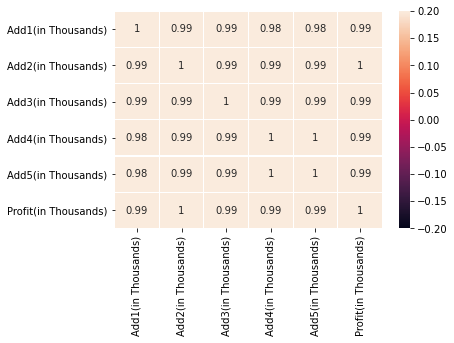

In [10]:
corrmatrix=d.corr()
plt.subplots()
sns.heatmap(corrmatrix,vmin=-.2,vmax=0.2,annot=True,linewidth=0.2)

# Insights
* Add1,add2,Add3,Add4,Add5 are highly positively corelated to porfit.
* That means porfit is highly dependent on these variables.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [28]:
data1=d.drop(['Date'],axis=1)

In [29]:
y=data1['Profit(in Thousands)']
X=data1.drop(['Profit(in Thousands)'],axis=1)

In [30]:
X.shape

(205, 5)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7,test_size = 0.3, random_state = 42)

In [32]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [33]:
model=lr.fit(X_train,y_train)

In [34]:
predictions=model.predict(X_test)

In [35]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
         ...   
56     4947.720
128    5185.639
76     5225.140
144    5111.806
104    5518.561
Name: Profit(in Thousands), Length: 62, dtype: float64


In [36]:
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457 4887.296 5805.521 4705.198 4404.686
 5465.277 4947.72  5185.639 5225.14  5111.806 5518.561]


In [49]:
from sklearn.metrics import r2_score
print('R-squared is\n',r2_score(y_test,predictions))

R-squared is
 1.0


# Insights 
*R squared value =1 ,it indicates that regression model perfectly fit for this data set.

*We will get good prediciton of profit with change in add expenses.

In [38]:
X.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90


# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

Add1(in Thousands) - 290

Add2(in Thousands) - 312

Add3(in Thousands) - 309

Add4(in Thousands) - 298

Add5(in Thousands) - 320

In [51]:
make_pred=[[290,312,309,298,320]]
m=model.predict(make_pred).item()

In [52]:
m

5820.059999999999

In [53]:
print('The predicted profit generated by company is(in thousands)',round(m))

The predicted profit generated by company is(in thousands) 5820
